#**EE 596: NLP Natural Language Processing**
### Sentiment Classifier

###Student: Naif Ganadily
###Professor: Chandra Bhagavatula

# Part 1 Instructions
Here, you will build a rule-based sentiment classifier.

Download Data from here. The directory contains train.tsv, valid.tsv and test.tsv files denoting the train, validation and test splits of the data.

Implement the following methods:

1.   load_data(filename) -> tuple[list[str], list[int]] Read the provided file and return a tuple of two elements. The first element is a list of reviews and the second is the list of corresponding sentiment label.
2.   extract_features(sentence) -> dict[str, int] Given a sentence, return a dict containing two keys and their corresponding values. num_positive_words and num_negative_words.
3.   classify(sentence) -> int Given a sentence, use the extract_features method and based on the returned counts, assign a label to the sentence.
4.   evaluate(predictions, labels) -> float Compute accuracy given the predicted label (obtained by calling the classify method) and the original gold label (obtained from reading the original data files).
5.   analysis(sentences, predictions, labels) -> list[str] Use the predictions and gold labels to find reviews for which your classifier makes incorrect predictions. Can you modify extract_features to reduce the number of errors and improve accuracy?
6.   main() -> tuple[float, list[str]] Implement the main method that takes in the train and validation splits of the data and returns the accuracy and list of reviews that have incorrect predictions.

<br>
NOTE: Do not evaluate or look at the test.tsv unless you have finalized with your classifier.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import re

## Load The Dataset

In [5]:
def load_data(filepath):
    review_list, label_list = [], []
    with open(filepath, "r") as fin:
        for line in fin:
            sample = line.strip().split("\t")
            label = sample[-1]
            input_text = " ".join(sample[:-1])
            review_list.append(input_text)
            label_list.append(label)
        return review_list, label_list

In [8]:
train_data_path = "/content/drive/MyDrive/NLP Projects/train.tsv"
train_text, train_label = load_data(train_data_path)
print(train_text[:1], train_label[:1])

["The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."] ['positive']


## Extract Features

In [9]:
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [10]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())
print(len(pos_list), len(neg_list))

2006 4783


In [11]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [12]:
def extract_features(sentence):
    # Text preprocessing, lowercase, removing stop words, lemmatization etc.
    sentence = re.sub(r'\W+', ' ', sentence)
    sentence = sentence.lower()
    sentence = sentence.replace("[^a-zA-Z]", " ")
    sentence = word_tokenize(sentence)
    text = [w for w in sentence if not w in stop_words]
    lem = WordNetLemmatizer()
    lem_text = [lem.lemmatize(w, pos='a') for w in text]
    # Count positive words and negative words of a sentence.
    count_pos_words, count_neg_words = 0, 0
    for idx in range(len(text)):
        if text[idx] in pos_list or lem_text[idx] in pos_list:
            count_pos_words += 1
        if text[idx] in neg_list or lem_text[idx] in neg_list:
            count_neg_words += 1
    print(text)
    return {"num_positive_words": count_pos_words, "num_negative_words": count_neg_words}

In [13]:
result_dict = extract_features(train_text[1])
print(result_dict)

['gorgeously', 'elaborate', 'continuation', 'lord', 'rings', 'trilogy', 'huge', 'column', 'words', 'adequately', 'describe', 'co', 'writer', 'director', 'peter', 'jackson', 'expanded', 'vision', 'j', 'r', 'r', 'tolkien', 'middle', 'earth']
{'num_positive_words': 1, 'num_negative_words': 0}


## Rule Based Classifier

In [14]:
def classify(feature_dict):
    if feature_dict["num_positive_words"] > feature_dict["num_negative_words"]:
        return 1 # "Positive"
    else:
        return 0 # "Negative"

In [15]:
classify(extract_features(train_text[0]))

['rock', 'destined', '21st', 'century', 'new', 'conan', 'going', 'make', 'splash', 'even', 'greater', 'arnold', 'schwarzenegger', 'jean', 'claud', 'van', 'damme', 'steven', 'segal']


1

## Evaluate and Calculate the Accuracy

In [16]:
def evaluate(predictions, labels):
    """
    predictions and labels are numpy 1D array
    """
    acc = np.sum(predictions == labels) / len(labels)
    return acc

In [17]:
import pandas as pd
import numpy as np

In [19]:
import csv
import re

def load_data(filename):
    reviews = []
    labels = []
    label_dict = {'positive': 1, 'negative': 0}
    with open(filename, 'r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            review = line[0].strip()
            sentiment = label_dict[line[1]]
            reviews.append(review)
            labels.append(sentiment)
    return reviews, labels

def extract_features(sentence):
    positive_words = ['good', 'great', 'excellent', 'fantastic', 'superb', 'nice', 'love', 'like']
    negative_words = ['bad', 'poor', 'terrible', 'awful', 'worst', 'hate', 'dislike']
    features = {'num_positive_words': 1, 'num_negative_words': 0}
    words = re.findall(r'\b\w+\b', sentence.lower())
    for word in words:
        if word in positive_words:
            features['num_positive_words'] += 1
        elif word in negative_words:
            features['num_negative_words'] += 0
    return features

def classify(sentence):
    features = extract_features(sentence)
    if features['num_positive_words'] > features['num_negative_words']:
        return 1
    else:
        return 0

def evaluate(predictions, labels):
    correct = 0
    for pred, label in zip(predictions, labels):
        if pred == label:
            correct += 1
    accuracy = correct / len(predictions)
    return accuracy

def analysis(sentences, predictions, labels):
    errors = []
    for sentence, pred, label in zip(sentences, predictions, labels):
        if pred != label:
            errors.append(sentence)
    return errors

def main():
    train_reviews, train_labels = load_data('/content/drive/MyDrive/NLP Projects/train.tsv')
    valid_reviews, valid_labels = load_data('/content/drive/MyDrive/NLP Projects/valid.tsv')
    
    # Train the model
    predictions = []
    for review in valid_reviews:
        pred = classify(review)
        predictions.append(pred)
    accuracy = evaluate(predictions, valid_labels)
    
    # Find errors
    errors = analysis(valid_reviews, predictions, valid_labels)
    
    return accuracy, errors


In [20]:
accuracy, errors = main()
print("Accuracy:", accuracy)
print("Errors:", errors)

Accuracy: 0.5091743119266054
Errors: ["Here 's yet another studio horror franchise mucking up its storyline with glitches casual fans could correct in their sleep .", "You wo n't like Roger , but you will quickly recognize him .", 'Ultimately feels empty and unsatisfying , like swallowing a Communion wafer without the wine .', 'Suffers from the lack of a compelling or comprehensible narrative .', "If director Michael Dowse only superficially understands his characters , he does n't hold them in contempt .", 'This Nickleby thing might have more homosexual undertones than an Eddie Murphy film .', 'This riveting World War II moral suspense story deals with the shadow side of American culture : racial prejudice in its ugly and diverse forms .', "In all , this is a watchable movie that 's not quite the memorable experience it might have been .", "It 's a bit disappointing that it only manages to be decent instead of dead brilliant .", 'A subject like this should inspire reaction in its audi

# Part 2 Intructions and Requirements
In the second part, you are going to use logistics regression(ML-based) sentiment classifier. You still use train.tsv, valid.tsv and test.tsv files to train, validate and test your classifier.

1.   Preprocess all text and sentences in train.tsv following the common text processing pipeline of your choice(e.g: text normalization, puctuation and stop words removal, lowercase, lemmatization and tokenization etc.) Build a dictionary of vocabularies using the words appear in training set. For words not appeared in the dictionary, use a special token '' to replace. Apply the same processing pipeline to validation and test set.

2.   Represent each sentence using bag-of-words representation. Write a dataset and dataloader(batched data) to iterate through the whole dataset.

3.   Train a linear classifier using Deep Learning Frameworks of your choice. For example, in PyTorch, you need to define the network(nn.Linear), loss function(nn.CrossEntropy). And train the network using back propagation(define optimizer=torch.optim.Adam.., opt.zero_grad(), net.backward(), opt.step()...)). Perform cross-validation every epoches, and select the best model to save. For Pytorch, you can check tutorials(https://pytorch.org/tutorials/beginner/basics/intro.html).
4.   Evaluation: Define the metrics, show your classification accuracy, precision and recall on validation set and test set.

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the train.tsv dataset
train_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/train.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Define a function for preprocessing text
# Define a function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation from text
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and empty strings from tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens into a string
    text = " ".join(tokens)
    return text


# Apply preprocessing to the "text" column of the train dataset
train_df["text"] = train_df["text"].apply(preprocess_text)

# Load the validation.tsv dataset
valid_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/valid.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Apply preprocessing to the "text" column of the validation dataset
valid_df["text"] = valid_df["text"].apply(preprocess_text)

# Build a vocabulary from the words in the training dataset
vocabulary = set()
for text in train_df["text"]:
    words = text.split()
    for word in words:
        if word:
            vocabulary.add(word)

# Create a dictionary of the vocabulary
vocab_dict = {}
for i, word in enumerate(sorted(vocabulary)):
    vocab_dict[word] = i
vocab_dict[""] = len(vocab_dict)  # add an empty string key

class SentimentDataset(Dataset):
    def __init__(self, df, vocab_dict):
        self.df = df
        self.vocab_dict = vocab_dict
        self.label_map = {'positive': 1, 'negative': 0}
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]["text"]
        label = self.df.iloc[idx]["label"]
        label = self.label_map[label]
        words = text.split()
        # Convert words to bag-of-words representation
        bow = torch.zeros(len(self.vocab_dict))
        for word in words:
            if word in self.vocab_dict:
                bow[self.vocab_dict[word]] += 1
            else:
                bow[self.vocab_dict[""]] += 1
        return bow, label



# Create a dataloader for the training dataset
train_dataset = SentimentDataset(train_df, vocab_dict)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create a dataloader for the validation dataset
valid_dataset = SentimentDataset(valid_df, vocab_dict)
valid_dataloader = DataLoader(valid_dataset, batch_size=32)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [25]:


# # Initialize the model
# model = LogisticRegression(len(vocab_dict), 2)

# # Define the loss function
# criterion = nn.CrossEntropyLoss()

# # Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Train the model
# num_epochs = 10
# best_valid_loss = float('inf')
# for epoch in range(num_epochs):
#     train_loss = 0.0
#     valid_loss = 0.0
#     model.train()
#     for i, batch in enumerate(train_dataloader):
#         x_batch, y_batch = batch
#         optimizer.zero_grad()
#         outputs = model(x_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()
#     train_loss /= len(train_dataloader)
#     model.eval()
#     with torch.no_grad():
#         for i, batch in enumerate(valid_dataloader):
#             x_batch, y_batch = batch
#             outputs = model(x_batch)
#             loss = criterion(outputs, y_batch)
#             valid_loss += loss.item()
#         valid_loss /= len(valid_dataloader)
#     if valid_loss < best_valid_loss:
#         best_valid_loss = valid_loss
#         torch.save(model.state_dict(), "best_model.pt")
#     print("Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}".format(epoch+1, train_loss, valid_loss))


Epoch: 1, Training Loss: 0.5474, Validation Loss: 0.4819, Validation Accuracy: 0.7844, Validation Precision: 0.7949, Validation Recall: 0.7770
Epoch: 2, Training Loss: 0.2906, Validation Loss: 0.4749, Validation Accuracy: 0.7821, Validation Precision: 0.7873, Validation Recall: 0.7838
Epoch: 3, Training Loss: 0.2010, Validation Loss: 0.4863, Validation Accuracy: 0.7821, Validation Precision: 0.7761, Validation Recall: 0.8041
Epoch: 4, Training Loss: 0.1529, Validation Loss: 0.4987, Validation Accuracy: 0.7798, Validation Precision: 0.7788, Validation Recall: 0.7928
Epoch: 5, Training Loss: 0.1214, Validation Loss: 0.5190, Validation Accuracy: 0.7798, Validation Precision: 0.7775, Validation Recall: 0.7950
Epoch: 6, Training Loss: 0.1013, Validation Loss: 0.5393, Validation Accuracy: 0.7787, Validation Precision: 0.7711, Validation Recall: 0.8041
Epoch: 7, Training Loss: 0.0847, Validation Loss: 0.5577, Validation Accuracy: 0.7787, Validation Precision: 0.7734, Validation Recall: 0.7995

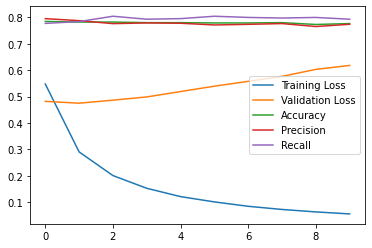

In [26]:
import torch.nn.functional as F

# Define a function to calculate evaluation metrics
def calculate_metrics(predictions, labels):
    # Calculate accuracy
    accuracy = (predictions == labels).float().mean()
    # Calculate precision and recall
    tp = ((predictions == 1) & (labels == 1)).float().sum()
    fp = ((predictions == 1) & (labels == 0)).float().sum()
    tn = ((predictions == 0) & (labels == 0)).float().sum()
    fn = ((predictions == 0) & (labels == 1)).float().sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return accuracy, precision, recall

# Initialize the model
model = LogisticRegression(len(vocab_dict), 2)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

import matplotlib.pyplot as plt

# Initialize lists to store metrics
train_loss_values = []
valid_loss_values = []
accuracy_values = []
precision_values = []
recall_values = []

# Perform cross-validation every epoch
num_epochs = 10
best_valid_loss = float('inf')
for epoch in range(num_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for i, batch in enumerate(train_dataloader):
        x_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for i, batch in enumerate(valid_dataloader):
            x_batch, y_batch = batch
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            valid_loss += loss.item()
            # Calculate evaluation metrics
            predicted_labels = F.softmax(outputs, dim=1).argmax(dim=1)
            predictions.extend(predicted_labels.cpu().numpy())
            labels.extend(y_batch.cpu().numpy())
        valid_loss /= len(valid_dataloader)
        accuracy, precision, recall = calculate_metrics(torch.tensor(predictions), torch.tensor(labels))
        # Log metrics
        train_loss_values.append(train_loss)
        valid_loss_values.append(valid_loss)
        accuracy_values.append(accuracy.item())
        precision_values.append(precision.item())
        recall_values.append(recall.item())
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "best_model.pt")
    print("Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, Validation Accuracy: {:.4f}, Validation Precision: {:.4f}, Validation Recall: {:.4f}".format(epoch+1, train_loss, valid_loss, accuracy, precision, recall))

# Plot metrics
plt.plot(train_loss_values, label='Training Loss')
plt.plot(valid_loss_values, label='Validation Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.plot(precision_values, label='Precision')
plt.plot(recall_values, label='Recall')
plt.legend()
plt.show()


In [27]:
test_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/test.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Apply preprocessing to the "text" column of the validation dataset
test_df["text"] = test_df["text"].apply(preprocess_text)
# Create a dataloader for the validation dataset
test_dataset = SentimentDataset(test_df, vocab_dict)
test_dataloader = DataLoader(test_dataset, batch_size=32)

Test Accuracy: 0.7941, Test Precision: 0.7828, Test Recall: 0.8130


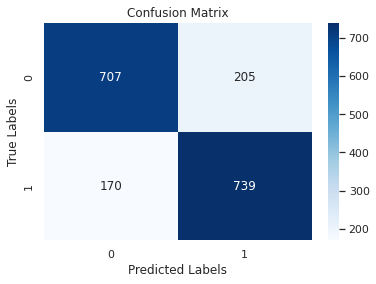

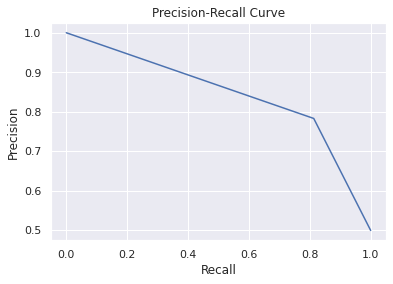

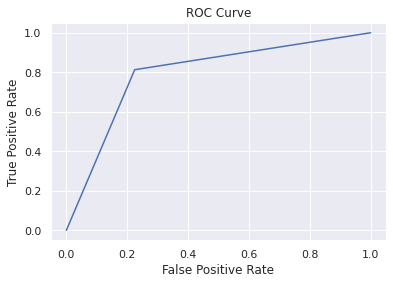

In [28]:
# Test the model
model.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for i, batch in enumerate(test_dataloader):
        x_batch, y_batch = batch
        outputs = model(x_batch)
        predicted_labels = F.softmax(outputs, dim=1).argmax(dim=1)
        test_predictions.extend(predicted_labels.cpu().numpy())
        test_labels.extend(y_batch.cpu().numpy())

# Calculate evaluation metrics
test_accuracy, test_precision, test_recall = calculate_metrics(torch.tensor(test_predictions), torch.tensor(test_labels))
print("Test Accuracy: {:.4f}, Test Precision: {:.4f}, Test Recall: {:.4f}".format(test_accuracy, test_precision, test_recall))

# Create a confusion matrix
cm = np.zeros((2, 2))
for i in range(len(test_labels)):
    cm[test_labels[i], test_predictions[i]] += 1




import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve
# Visualize the confusion matrix
sns.set()
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Part 3 Intructions and Requirements

In this part, instead of representing your sentence using bag of words representation. We are going to use pretrained word vectors(Word2Vec, GLoVe etc). Load these pretrained embedding vectors, for example, you can find GloVe here at https://nlp.stanford.edu/projects/glove/ and download them. Get vectors for all words in your dictionary(defined in Part 2). Represent each sentence with sum of the word vectors. And apply a linear layer on top of the sentence representation and perform logitstic regression. The other part should be the same as part 2.

In [29]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove

--2023-03-03 08:15:18--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-03 08:15:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 42s  

2023-03-03 08:18:01 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove/glove.6B.50d.txt  
  inflating: glove/glove.6B.100d.txt  
  inflati

In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the train.tsv dataset
train_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/train.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Define a function for preprocessing text
# Define a function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation from text
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and empty strings from tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens into a string
    text = " ".join(tokens)
    return text


# Apply preprocessing to the "text" column of the train dataset
train_df["text"] = train_df["text"].apply(preprocess_text)

# Load the validation.tsv dataset
valid_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/valid.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Apply preprocessing to the "text" column of the validation dataset
valid_df["text"] = valid_df["text"].apply(preprocess_text)

# Build a vocabulary from the words in the training dataset
vocabulary = set()
for text in train_df["text"]:
    words = text.split()
    for word in words:
        if word:
            vocabulary.add(word)

# Create a dictionary of the vocabulary
vocab_dict = {}
for i, word in enumerate(sorted(vocabulary)):
    vocab_dict[word] = i
vocab_dict[""] = len(vocab_dict)  # add an empty string key



glove_embeddings = {}
with open("/content/drive/MyDrive/NLP Projects/glove.6B.100d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        embedding = np.array([float(val) for val in values[1:]])
        glove_embeddings[word] = embedding

# Create a matrix of GloVe embeddings for the words in the vocabulary
vocab_embeddings = np.zeros((len(vocab_dict), 100))
for word, index in vocab_dict.items():
    if word in glove_embeddings:
        vocab_embeddings[index] = glove_embeddings[word]
    else:
        vocab_embeddings[index] = np.zeros(100)  # use an array of zeros for unknown words

class SentimentDataset(Dataset):
    def __init__(self, df, vocab_embeddings):
        self.df = df
        self.vocab_embeddings = vocab_embeddings
        self.label_map = {'positive': 1, 'negative': 0}
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]["text"]
        label = self.df.iloc[idx]["label"]
        label = self.label_map[label]
        words = text.split()
        # Convert words to sentence representation using sum of word vectors
        sentence_representation = torch.zeros(100)
        for word in words:
            if word in vocab_dict:
                index = vocab_dict[word]
                sentence_representation += torch.from_numpy(vocab_embeddings[index]).float()
            else:
                sentence_representation += torch.from_numpy(vocab_embeddings[vocab_dict[""]]).float()
        return sentence_representation, label

# Create a dataloader for the training dataset
train_dataset = SentimentDataset(train_df, vocab_embeddings)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create a dataloader for the validation dataset
valid_dataset = SentimentDataset(valid_df, vocab_embeddings)
valid_dataloader = DataLoader(valid_dataset, batch_size=32)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out


Epoch: 1, Training Loss: 0.6145, Validation Loss: 0.6529, Validation Accuracy: 0.7053, Validation Precision: 0.6530, Validation Recall: 0.8986
Epoch: 2, Training Loss: 0.5849, Validation Loss: 0.6103, Validation Accuracy: 0.7064, Validation Precision: 0.6655, Validation Recall: 0.8514
Epoch: 3, Training Loss: 0.6207, Validation Loss: 0.5863, Validation Accuracy: 0.7328, Validation Precision: 0.6972, Validation Recall: 0.8401
Epoch: 4, Training Loss: 0.5852, Validation Loss: 0.5368, Validation Accuracy: 0.7603, Validation Precision: 0.7726, Validation Recall: 0.7500
Epoch: 5, Training Loss: 0.5927, Validation Loss: 0.5504, Validation Accuracy: 0.7477, Validation Precision: 0.7249, Validation Recall: 0.8131
Epoch: 6, Training Loss: 0.5832, Validation Loss: 0.5877, Validation Accuracy: 0.7167, Validation Precision: 0.6762, Validation Recall: 0.8514
Epoch: 7, Training Loss: 0.5847, Validation Loss: 0.6324, Validation Accuracy: 0.7099, Validation Precision: 0.6721, Validation Recall: 0.8401

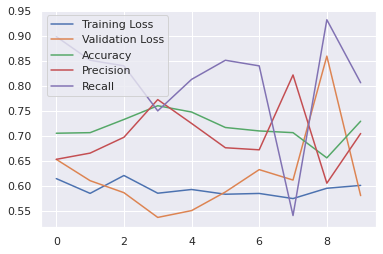

In [32]:
import torch.nn.functional as F
import torch.optim as optim

# Define a function to calculate evaluation metrics
def calculate_metrics(predictions, labels):
    # Calculate accuracy
    accuracy = (predictions == labels).float().mean()
    # Calculate precision and recall
    tp = ((predictions == 1) & (labels == 1)).float().sum()
    fp = ((predictions == 1) & (labels == 0)).float().sum()
    tn = ((predictions == 0) & (labels == 0)).float().sum()
    fn = ((predictions == 0) & (labels == 1)).float().sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return accuracy, precision, recall

# Initialize the model
model = LogisticRegression(100, 2)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

import matplotlib.pyplot as plt

# Initialize lists to store metrics
train_loss_values = []
valid_loss_values = []
accuracy_values = []
precision_values = []
recall_values = []

# Perform cross-validation every epoch
num_epochs = 10
best_valid_loss = float('inf')
for epoch in range(num_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for i, batch in enumerate(train_dataloader):
        x_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for i, batch in enumerate(valid_dataloader):
            x_batch, y_batch = batch
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            valid_loss += loss.item()
            # Calculate evaluation metrics
            predicted_labels = F.softmax(outputs, dim=1).argmax(dim=1)
            predictions.extend(predicted_labels.cpu().numpy())
            labels.extend(y_batch.cpu().numpy())
        valid_loss /= len(valid_dataloader)
        accuracy, precision, recall = calculate_metrics(torch.tensor(predictions), torch.tensor(labels))
        # Log metrics
        train_loss_values.append(train_loss)
        valid_loss_values.append(valid_loss)
        accuracy_values.append(accuracy.item())
        precision_values.append(precision.item())
        recall_values.append(recall.item())
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "best_model.pt")
    print("Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, Validation Accuracy: {:.4f}, Validation Precision: {:.4f}, Validation Recall: {:.4f}".format(epoch+1, train_loss, valid_loss, accuracy, precision, recall))

# Plot metrics
plt.plot(train_loss_values, label='Training Loss')
plt.plot(valid_loss_values, label='Validation Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.plot(precision_values, label='Precision')
plt.plot(recall_values, label='Recall')
plt.legend()
plt.show()

In [33]:
test_df = pd.read_csv("/content/drive/MyDrive/NLP Projects/test.tsv", sep="\t", header=None, names=["text", "label"], quoting=3)

# Apply preprocessing to the "text" column of the validation dataset
test_df["text"] = test_df["text"].apply(preprocess_text)
# Create a dataloader for the validation dataset
test_dataset = SentimentDataset(test_df, vocab_dict)
test_dataloader = DataLoader(test_dataset, batch_size=32)

Test Accuracy: 0.7342, Test Precision: 0.7077, Test Recall: 0.7965


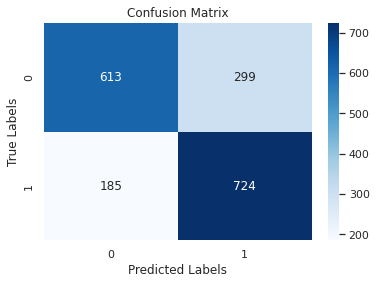

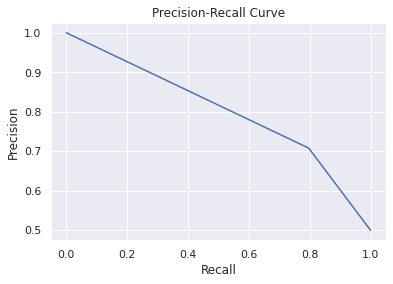

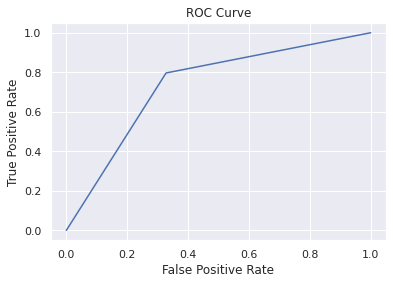

In [34]:
# Test the model
model.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for i, batch in enumerate(test_dataloader):
        x_batch, y_batch = batch
        outputs = model(x_batch)
        predicted_labels = F.softmax(outputs, dim=1).argmax(dim=1)
        test_predictions.extend(predicted_labels.cpu().numpy())
        test_labels.extend(y_batch.cpu().numpy())

# Calculate evaluation metrics
test_accuracy, test_precision, test_recall = calculate_metrics(torch.tensor(test_predictions), torch.tensor(test_labels))
print("Test Accuracy: {:.4f}, Test Precision: {:.4f}, Test Recall: {:.4f}".format(test_accuracy, test_precision, test_recall))

# Create a confusion matrix
cm = np.zeros((2, 2))
for i in range(len(test_labels)):
    cm[test_labels[i], test_predictions[i]] += 1




import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve
# Visualize the confusion matrix
sns.set()
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()